In [1]:
import os
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_path = os.getenv("HOME")+'/aiffel/kaggle_kakr_housing'
train_path = join(data_path, "train.csv")
test_path = join(data_path, "test.csv")
submission_path = join(data_path, "gender_submission.csv")

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
sample_submission = pd.read_csv(submission_path)

In [3]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
feature_name = list(test) # test의 feature값이 출력됨
df_train = train[feature_name] #test의 feature를 가져다씀 >>> survived 값이 빠짐
df = pd.concat((df_train, test)) #위의 작업은 train, test를 이어붙이기 위함

In [10]:
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
print(train.shape, test.shape, df.shape)

(891, 12) (418, 11) (1309, 11)


In [12]:
target = train["Survived"] #예측해야하는 값을 target으로 설정

In [13]:
def stack_plot(feature): #각 특성별 분석자료 출력을 위한 함수
    survived = train[train["Survived"] == 1][feature].value_counts() #생존자 카운팅
    dead = train[train["Survived"] ==0][feature].value_counts()      #사망자 카운팅
    df = pd.DataFrame([survived,dead]) #생존자, 사망자 데이터프레임화
    df.index= ["survived", "dead"] #인덱스를 생존자 사망자로 설정
    df.plot(kind='bar', stacked = True, figsize = (10,5)) #바그래프

([<matplotlib.patches.Wedge at 0x7f92187fd670>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'survived'),
  Text(0.3925750313068116, -1.0275625746369201, 'dead')],
 [Text(-0.21413178278152267, 0.5604886971231505, '62%'),
  Text(0.21413183525826085, -0.5604886770746836, '38%')])

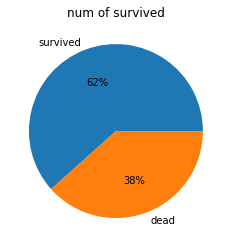

In [14]:
lable = ["survived", "dead"]
plt.title("num of survived")
plt.pie(train["Survived"].value_counts(), labels = lable,autopct="%.f%%")

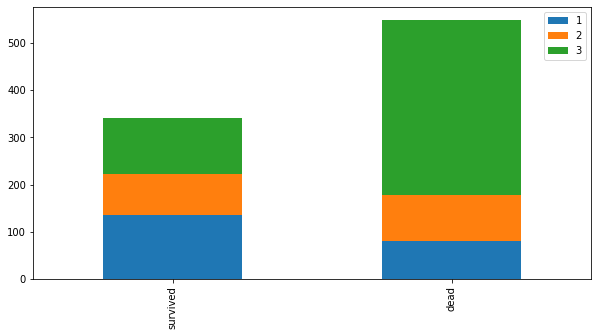

In [15]:
stack_plot("Pclass")

In [16]:
Pclass_encoded = pd.get_dummies(df["Pclass"], prefix = "Pclass")
df = pd.concat((df, Pclass_encoded), axis = 1)
df = df.drop(columns = "Pclass")

위의 과정은 get_dummies를 이용하여 원 핫 인코딩으로 변환
그대로 둘 경우 관계성이 없는데도 있다고 잘못 착각할 가능성 존재
범주형 변수라서 가능한 것

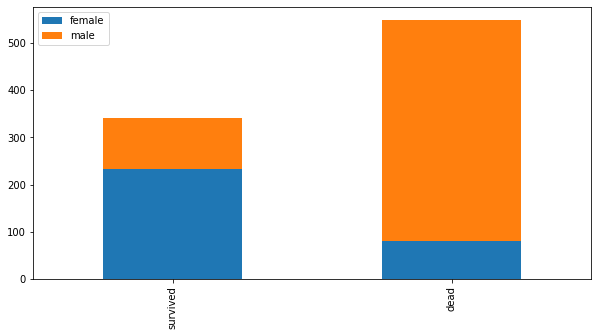

In [17]:
stack_plot("Sex")

In [18]:
sex_encoded = pd.get_dummies(df["Sex"], prefix = "Sex")
df = pd.concat((df, sex_encoded), axis=1)
df = df.drop(columns = "Sex")

In [19]:
df.drop("Sex_female", axis=1, inplace = True)

범주형 변수이므로 get_dummies를 사용.
위와 마찬가지로 원 핫 인코딩을 해주고 기존 df에 이어붙인 뒤 Sex column 삭제

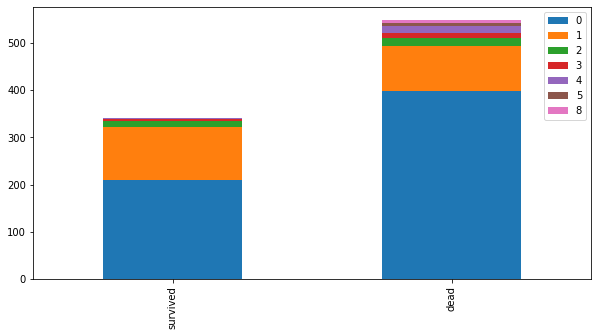

In [20]:
stack_plot("SibSp")

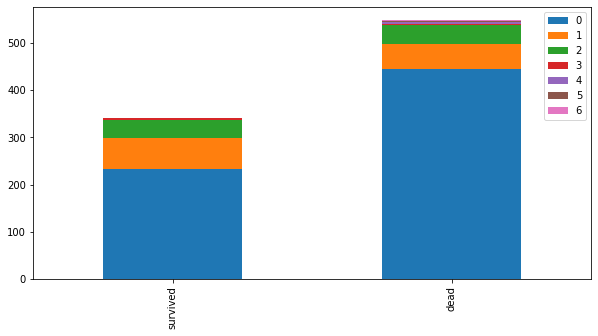

In [21]:
stack_plot("Parch")

In [22]:
df["Travelpeople"] = df["SibSp"] + df["Parch"]
df["TravelAlone"] = np.where(df["Travelpeople"]>0,0,1)
# np.where을 이용하여 Travelpeople이 1명이상이라면 0, 0명이라면 1을 출력
# 형식 = np.where(condition, T, F) 값 변경

In [23]:
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)

In [24]:
df.drop("Travelpeople", axis=1, inplace = True)

sibsp, parch는 같이 여행을 왔다는 공통점이 존재. 
하나로 합친다음 혼자 여행을 왔는지 아닌지에 해당하는 변수 생성

In [25]:
df["New_name"] = df["Name"].str.extract('([A-Za-z]+)\.', expand=False)
train["New_name"] = train["Name"].str.extract('([A-Za-z]+)\.', expand=False)

In [26]:
train ['New_name'] =  train['New_name'].map({"Mr": 0 , "Mrs":2, "Miss":1,"Dr":3,"Rev":3,
                                             "Mlle":3,"Major":3,"Col":3,"Ms":3,"Jonkheer":3,
                                             "Sir" :3,"Lady":3,"Mme":3,"Capt":3,"Don":3,"Countess":3})
df['New_name'] =  df['New_name'].map({"Mr": 0 , "Mrs":2, "Miss":1,"Dr":3,"Rev":3,
                                             "Mlle":3,"Major":3,"Col":3,"Ms":3,"Jonkheer":3,
                                             "Sir" :3,"Lady":3,"Mme":3,"Capt":3,"Don":3,"Countess":3})

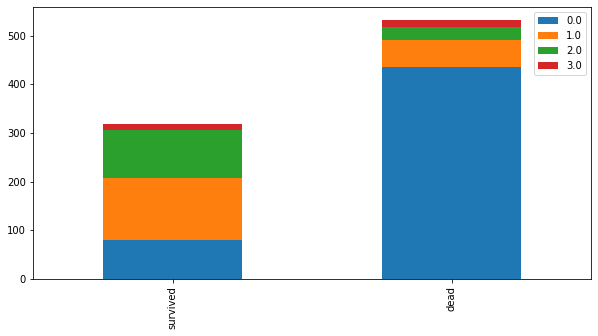

In [27]:
stack_plot("New_name")

In [28]:
df["New_name"] = df["New_name"].fillna('0')

In [29]:
df= df.astype({"New_name":"float"})

In [30]:
df = df.drop(columns = "Name")

In [31]:
New_name_encoded = pd.get_dummies(df["New_name"], prefix = "New_name")
df = pd.concat((df, New_name_encoded), axis = 1)
df = df.drop(columns = "New_name")

정규표현식 활용 => name feature처리.(남, 여, 그외)
남자가 많이 죽었으므로 결측치를 남자로 채움

<AxesSubplot:>

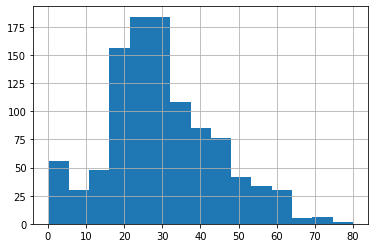

In [32]:
df["Age"].hist(bins=15)

In [33]:
df["Age"].fillna(28, inplace=True)

우측으로 기울어짐 발견 => 평균값보다 중앙값이 나을 것으로 판단된다고 함

<AxesSubplot:xlabel='Embarked', ylabel='count'>

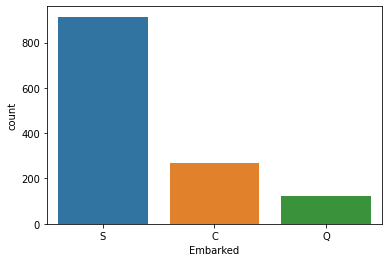

In [34]:
sns.countplot(x = "Embarked", data= df)

In [35]:
df["Embarked"].fillna("S", inplace=True)

In [37]:
Embarked_encoded = pd.get_dummies(df['Embarked'],prefix= 'Embarked')
df = pd.concat((df,Embarked_encoded), axis=1)
df = df.drop(columns = 'Embarked')

선착장의 경우 s선착장이 많으므로 결측치를 s로 대체
범주형 변수이므로 원 핫 인코딩으로 만듬

In [38]:
from scipy.stats import norm

<AxesSubplot:xlabel='Fare', ylabel='Density'>

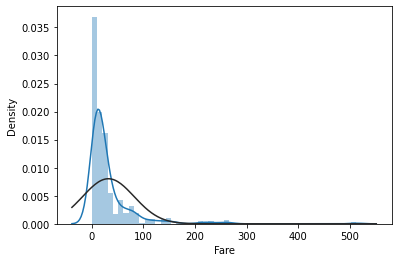

In [41]:
sns.distplot(train["Fare"], fit = norm)

비대칭이므로 대칭형으로 변환 필요

In [42]:
df["Fare"] = df["Fare"].map(lambda i : np.log(i) if i>0 else 0)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

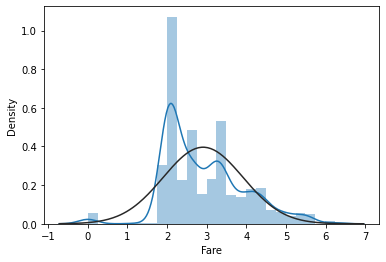

In [43]:
sns.distplot(df["Fare"], fit=norm)

In [44]:
df["Cabin"].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: Cabin, Length: 186, dtype: int64

In [45]:
df =df.drop(columns = "Cabin")

결측값이 많아서 드롭. 지불 운임으로도 대체가능할 듯

In [46]:
df = df.drop(["PassengerId", "Ticket"], axis=1)

모델링과정에서 필요없는 두 변수도 제거

In [47]:
df.isnull().sum()

Age             0
Fare            0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Sex_male        0
TravelAlone     0
New_name_0.0    0
New_name_1.0    0
New_name_2.0    0
New_name_3.0    0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

# 모델링

In [49]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

로지스틱회귀

In [50]:
new_train = df[:train.shape[0]] #값을 찍었을때 891번째까지라고 나옴
new_test = df[train.shape[0]:] #891부터 나머지

In [51]:
cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S",
      "Sex_male",'New_name_0.0','New_name_1.0', 'New_name_2.0'] 

In [53]:
X = new_train[cols]
Y = train["Survived"]

In [54]:
import statsmodels.api as sm
from scipy import stats

stats.chisqprob = lambda chisq, df:stats.chi2.df(chisq, df) #카이제곱검정
logit_model = sm.Logit(Y,X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.445151
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      880
Method:                           MLE   Df Model:                           10
Date:                Sat, 05 Mar 2022   Pseudo R-squ.:                  0.3315
Time:                        08:17:41   Log-Likelihood:                -396.63
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.393e-78
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Age             -0.0386      0.008     -4.734      0.000      -0.055      -0.023
Fare             0.1720

p-value가 0.05이상인 것들을 제거하고 재확인

In [55]:
cols2 = ["Age", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_S",
      "Sex_male",'New_name_1.0', 'New_name_2.0'] 

In [56]:
X2 = new_train[cols2]
Y = train["Survived"]

logit_model = sm.Logit(Y,X2)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.446233
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Sat, 05 Mar 2022   Pseudo R-squ.:                  0.3299
Time:                        08:28:48   Log-Likelihood:                -397.59
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.611e-80
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Age             -0.0384      0.008     -4.773      0.000      -0.054      -0.023
TravelAlone      0.2767

p-value가 0.05이상인 값 제거 후 다시 시도

In [57]:
cols3=["Age", "Pclass_1", "Pclass_2","Embarked_S",
      "Sex_male",'New_name_1.0', 'New_name_2.0'] 

In [58]:
X3=new_train[cols3]
Y=train['Survived']

logit_model=sm.Logit(Y,X3)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.447313
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Sat, 05 Mar 2022   Pseudo R-squ.:                  0.3283
Time:                        08:29:33   Log-Likelihood:                -398.56
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.944e-81
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Age             -0.0349      0.008     -4.617      0.000      -0.050      -0.020
Pclass_1         2.3477

In [59]:
f_test = new_test[cols3]

In [60]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X3, Y)

print("모델 Accuracy : {:.2f}%".format(logreg.score(X3, Y)*100))

모델 Accuracy : 80.36%


kfold 사용

In [61]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

In [62]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [64]:
kfold = StratifiedKFold(n_splits=8)

In [65]:
random_state = 1
clf = []

clf.append(XGBClassifier(random_state = random_state))
clf.append(LGBMClassifier(random_state = random_state))
clf.append(KNeighborsClassifier())
clf.append(RandomForestClassifier(random_state=random_state))
clf.append(GradientBoostingClassifier(random_state=random_state))
clf.append(DecisionTreeClassifier(random_state=random_state))
clf.append(LogisticRegression(random_state = random_state))
clf.append(SVC(random_state=random_state))

In [66]:
clf_results = []
for classifier in clf:
    clf_results.append(cross_val_score(classifier, new_train, y=Y, scoring = "accuracy", cv=kfold, n_jobs=4))

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be r

In [67]:
clf_means = []
clf_std = []
for clf_result in clf_results:
    clf_means.append(clf_result.mean())
    clf_std.append(clf_result.std())

In [68]:
clf_re = pd.DataFrame({"CrossValMeans":clf_means,"CrossValerrors": clf_std})
clf_re

,CrossValMeans,CrossValerrors
0,0.817125,0.029381
1,0.817095,0.034944
2,0.798041,0.029989
3,0.804768,0.031681
4,0.826104,0.034472
5,0.783482,0.036045
6,0.796865,0.034066
7,0.698108,0.025867


모델이 8개이므로 8개로 분리됨

파라미터 튜닝, 그리드서치cv 사용

In [70]:
# XGBoost 파라미터 튜닝 
XGB = XGBClassifier()
xgb_param_grid = {'learning_rate': [1,0.1,0.01,0.001],
              'n_estimators': [50, 100, 200, 500, 1000],
              'max_depth' : [1,3,5,10,50]}
gsXGB = GridSearchCV(XGB,param_grid = xgb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsXGB.fit(new_train,Y)
XGB_best = gsXGB.best_estimator_

# 최고 점수
gsXGB.best_score_

Fitting 8 folds for each of 100 candidates, totalling 800 fits


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[08:32:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:34:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[08:32:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:34:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[08:32:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[08:32:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:33:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:33:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

KeyboardInterrupt: 

In [ ]:
#LGBMClassifier 파라미터 튜닝
LGB= LGBMClassifier()
lgb_param_grid = {
    'n_estimators': [400, 700, 1000], 
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'min_split_gain': [0.3, 0.4],
}

gsLGB = GridSearchCV(LGB, param_grid = lgb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsLGB.fit(new_train, Y)
LGB_best = gsLGB.best_estimator_

#최고점수
gsLGB.best_score_

In [ ]:
# RandomForestClassifier 파라미터 튜닝 
RFC = RandomForestClassifier()

rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 7],
              "min_samples_split": [2, 3, 7],
              "min_samples_leaf": [1, 3, 7],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsRFC.fit(new_train,Y)
RFC_best = gsRFC.best_estimator_

# 최고 점수
gsRFC.best_score_

In [ ]:
# Gradient boosting 파라미터 튜닝
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsGBC.fit(new_train,Y)
GBC_best = gsGBC.best_estimator_

# 최고 점수
gsGBC.best_score_

In [ ]:
#예측 - 앙상블
test_Survived_XGB = pd.Series(XGB_best.predict(new_test), name="XGB")
test_Survived_LGB = pd.Series(LGB_best.predict(new_test), name="LGB")
test_Survived_RFC = pd.Series(RFC_best.predict(new_test), name="RFC")
test_Survived_GBC = pd.Series(GBC_best.predict(new_test), name="GBC")

ensemble_results = pd.concat([test_Survived_XGB,test_Survived_LGB,
                              test_Survived_RFC,test_Survived_GBC],axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)

상관성이 높은 rfc와 lgb모델을 이용하여 앙상블하고 결과제출

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
votingC = VotingClassifier(estimators=[('XGB', XGB_best), ('LGB', LGB_best),
('RFC', RFC_best), ('GBC',GBC_best)], voting='soft', n_jobs=4)
votingC = votingC.fit(new_train, Y)  

In [ ]:
test_Survived = pd.Series(votingC.predict(new_test), name="Survived")

In [ ]:
submission = pd.DataFrame({
    "PassengerId" :test["PassengerId"],
    "Survived": test_Survived
})

In [ ]:
submission.to_csv('voting_titanic.csv',index=False) 

투표하는 방식으로 예측을 진행

In [ ]:
from mlxtend.classifier import StackingClassifier
from sklearn.utils.testing import ignore_warnings

In [ ]:
clf1 = XGB_best
clf2 = LGB_best
clf3 = RFC_best
clf4 = GBC_best

lr = LogisticRegression()
st_clf = StackingClassifier(classifiers=[clf1, clf1, clf2, clf3, clf4], meta_classifier=lr)
params = {'meta_classifier__C': [0.1,1.0,5.0,10.0] ,
          #'use_probas': [True] ,
          #'average_probas': [True] ,
          'use_features_in_secondary' : [True, False]
         }
with ignore_warnings(category=DeprecationWarning):
    st_clf_grid = GridSearchCV(estimator=st_clf, param_grid=params, cv=5, refit=True)
    st_clf_grid.fit(new_train, Y)
    st_clf_grid.best_score_

In [ ]:
with ignore_warnings(category=DeprecationWarning):    
    pred_all_stack = st_clf_grid.predict(new_test)

submission1 = pd.DataFrame({
    "PassengerId" :test["PassengerId"],
    "Survived": pred_all_stack
})
#submission1.to_csv('stack_clf.csv',index=False)

필사코드 원본 : https://www.kaggle.com/munmun2004/titanic-for-begginers

# 회고
과제를 제외하고 실제로 필사해보는것은 처음이라 생소한 개념이 많이 나왔다.
처음에는 주석을 달고 계속 진행을 하려고 했는데 지나보니 모르는 개념만 검색해보고 빠르게 넘어와서 큰 공부가 안되었던 것 같다.
다음에 필사를 하게 된다면 난이도가 더 낮은 노트북을 찾아서 꼼꼼히 필사를 해야할 것 같다.